<a href="https://colab.research.google.com/github/othniel77/datascience/blob/main/Telecom_churn(d%C3%A9sabonnement).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import files
data_to_load = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [4]:
telecom = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Préparation des données

### convertir des variables binaires (yes/no) à (0/1)


In [5]:
# List of variable to map
varlist = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
# Defining the map function
def binary_map(x):
    return x.map({'Yes':1, 'No':0})
# Applying the function on the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)
telecom.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


### one hot encoding (créer des dummies de plusieurs variables   catégorielles

In [6]:
dummy1 = pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],dtype=int, drop_first = True)
# Adding the result to master Dataframe
telecom = pd.concat([telecom, dummy1], axis = 1)
telecom.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,29.85,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,1889.5,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,108.15,1,0,0,0,0,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1840.75,0,1,0,0,0,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,151.65,1,0,0,0,1,0,0,1,0


In [7]:
# Creating a dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines', dtype=int)
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], axis=1)
# Adding the result into master data
telecom = pd.concat([telecom, ml1], axis=1)
# Creating a dummy variables for the variable 'OnlineSecurity'
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity',dtype=int)
# Dropping MultipleLines_No phone service column
os1 = os.drop(['OnlineSecurity_No internet service'], axis=1)
# Adding the result into master data
telecom = pd.concat([telecom, os1], axis=1)
# Creating a dummy variables for the variable 'OnlineBackup'
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup', dtype=int)
# Dropping MultipleLines_No phone service column
ob1 = ob.drop(['OnlineBackup_No internet service'], axis=1)
# Adding the result into master data
telecom = pd.concat([telecom, ob1], axis=1)
# Creating a dummy variables for the variable 'DeviceProtection'
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection',dtype=int)
# Dropping MultipleLines_No phone service column
dp1 = dp.drop(['DeviceProtection_No internet service'], axis=1)
# Adding the result into master data
telecom = pd.concat([telecom, dp1], axis=1)
# Creating a dummy variables for the variable 'TechSupport'
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport', dtype=int)
# Dropping MultipleLines_No phone service column
ts1 = ts.drop(['TechSupport_No internet service'], axis=1)
# Adding the result into master data
telecom = pd.concat([telecom, ts1], axis=1)
# Creating a dummy variables for the variable 'StreamingTV'
st = pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV', dtype=int)
# Dropping MultipleLines_No phone service column
st1 = st.drop(['StreamingTV_No internet service'], axis=1)
# Adding the result into master data
telecom = pd.concat([telecom, st1], axis=1)
# Creating a dummy variables for the variable 'StreamingMovies'
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies',dtype=int)
# Dropping MultipleLines_No phone service column
sm1 = sm.drop(['StreamingMovies_No internet service'], axis=1)
# Adding the result into master data
telecom = pd.concat([telecom, sm1], axis=1)
telecom.drop(['OnlineSecurity'], inplace = True, axis=1)
telecom.drop(['DeviceProtection'], inplace = True, axis=1)
telecom.drop(['OnlineBackup'], inplace = True, axis=1)
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,TechSupport,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,No,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,No,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,1,0,1,0,1,0,1,0,1,0


### Supprimons les variables répétitives

In [8]:
# I have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService',
'TechSupport','StreamingTV','StreamingMovies'], axis=1)

# The variable was imported as a string we need to convert it to float
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'],errors='coerce')
telecom.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   int64  
 11  Cont

## Vérifions les valeurs abérrantes

In [9]:
# Checking for outlier for the given variables
num_telecom =telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
# Checking outliers at 24%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])


,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


Vérifions les valeurs nulles

In [10]:
# Adding the missing values (Column-Wise)
telecom.isnull().sum()

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [11]:
# Removein NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

### étape pour diviser les ensembles de données Train et Test

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
# Putting features variable to X
X = telecom.drop(['Churn','customerID'], axis=1)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,...,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,...,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,0,0,...,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,1,0,...,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,151.65,0,0,...,1,0,1,0,1,0,1,0,1,0


In [14]:
# Putting response variable to y
y = telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [21]:
# Spliting the data into Test_Train_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3, random_state=100)

### Standardiser les variables

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()


In [24]:
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,...,0,1,0,1,1,0,1,0,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,...,1,0,0,1,0,1,0,1,0,1


In [25]:
### Checking the churn rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn


26.578498293515356

Nous avons environ 27% du taux de désabonnement


## Cherchons la corrélation

In [26]:
# Importing the matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
telecom.drop(['customerID'], inplace = True, axis=1)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   PaperlessBilling                       7032 non-null   int64  
 6   MonthlyCharges                         7032 non-null   float64
 7   TotalCharges                           7032 non-null   float64
 8   Churn                                  7032 non-null   int64  
 9   Contract_One year                      7032 non-null   int64  
 10  Contract_Two year                      7032 non-null   int64  
 11  Paym

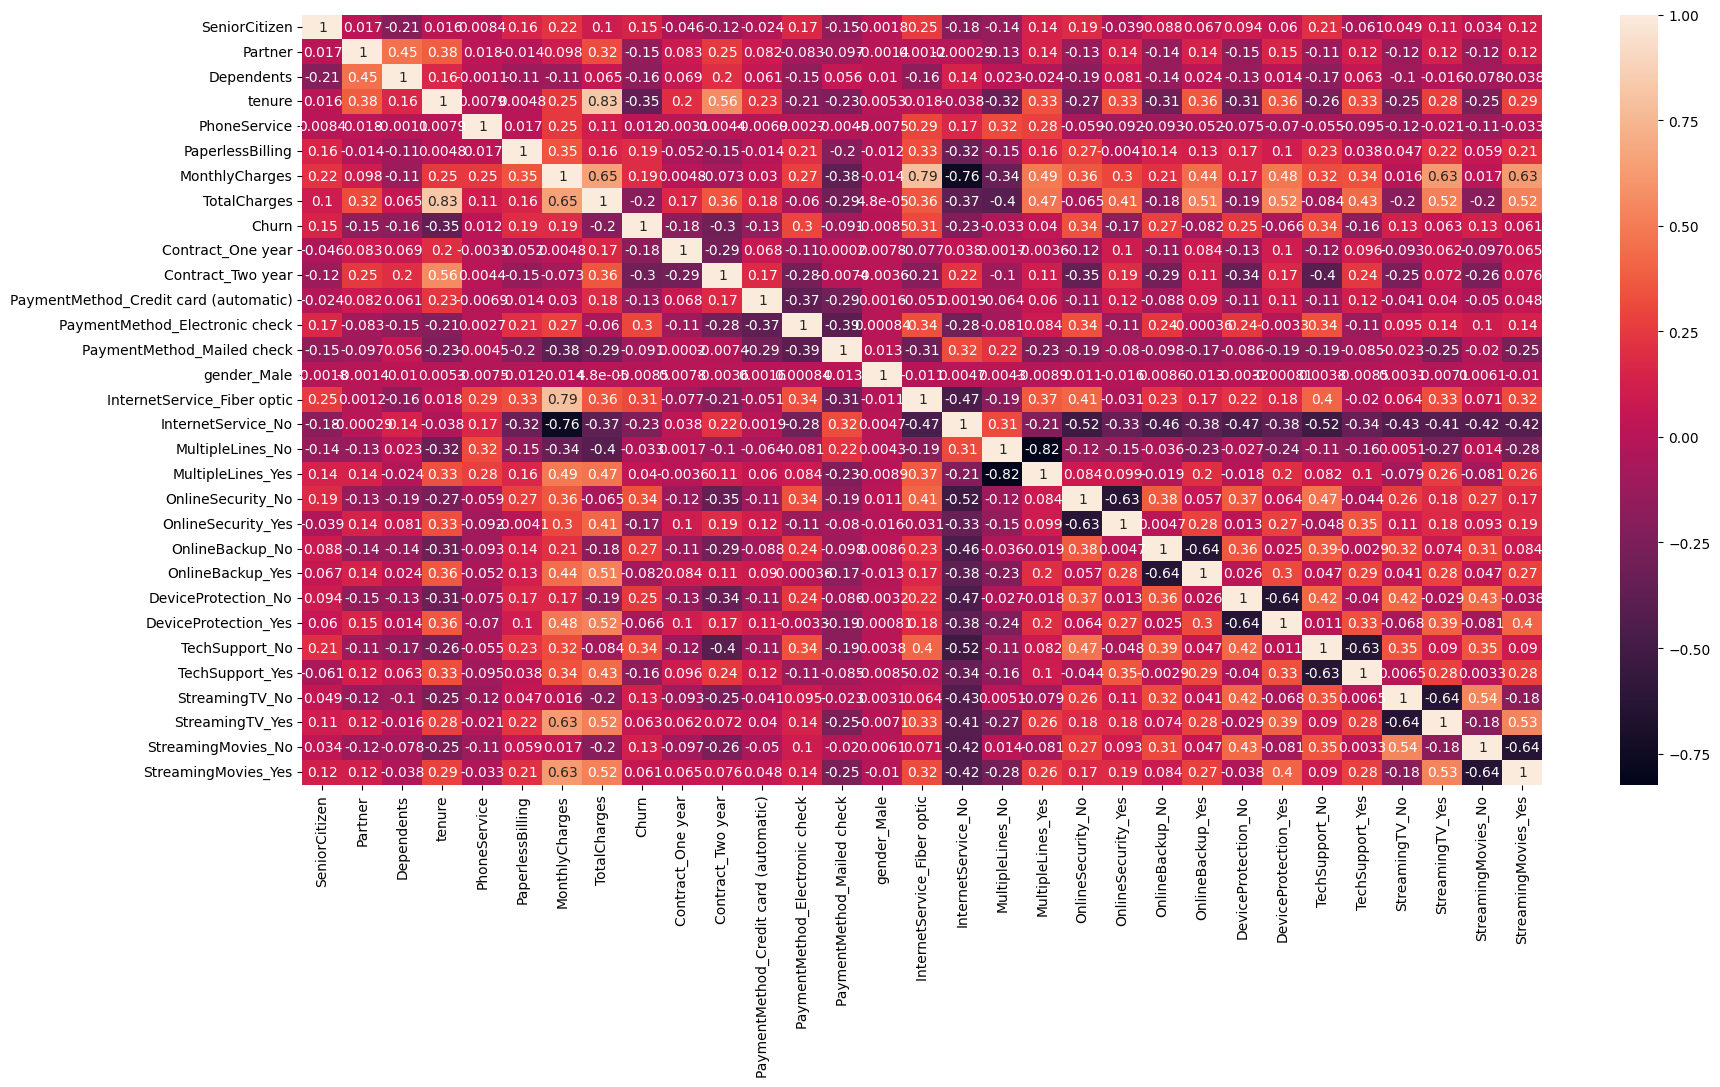

In [28]:
# # Let's see the correlation matrix
plt.figure(figsize = (20,10)) # Size of the figure
sns.heatmap(telecom.corr(), annot = True)
plt.show()


## Supprimons les variables dummies les plus corrélés

In [29]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
'StreamingTV_No','StreamingMovies_No'], axis=1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
'StreamingTV_No','StreamingMovies_No'], axis=1)

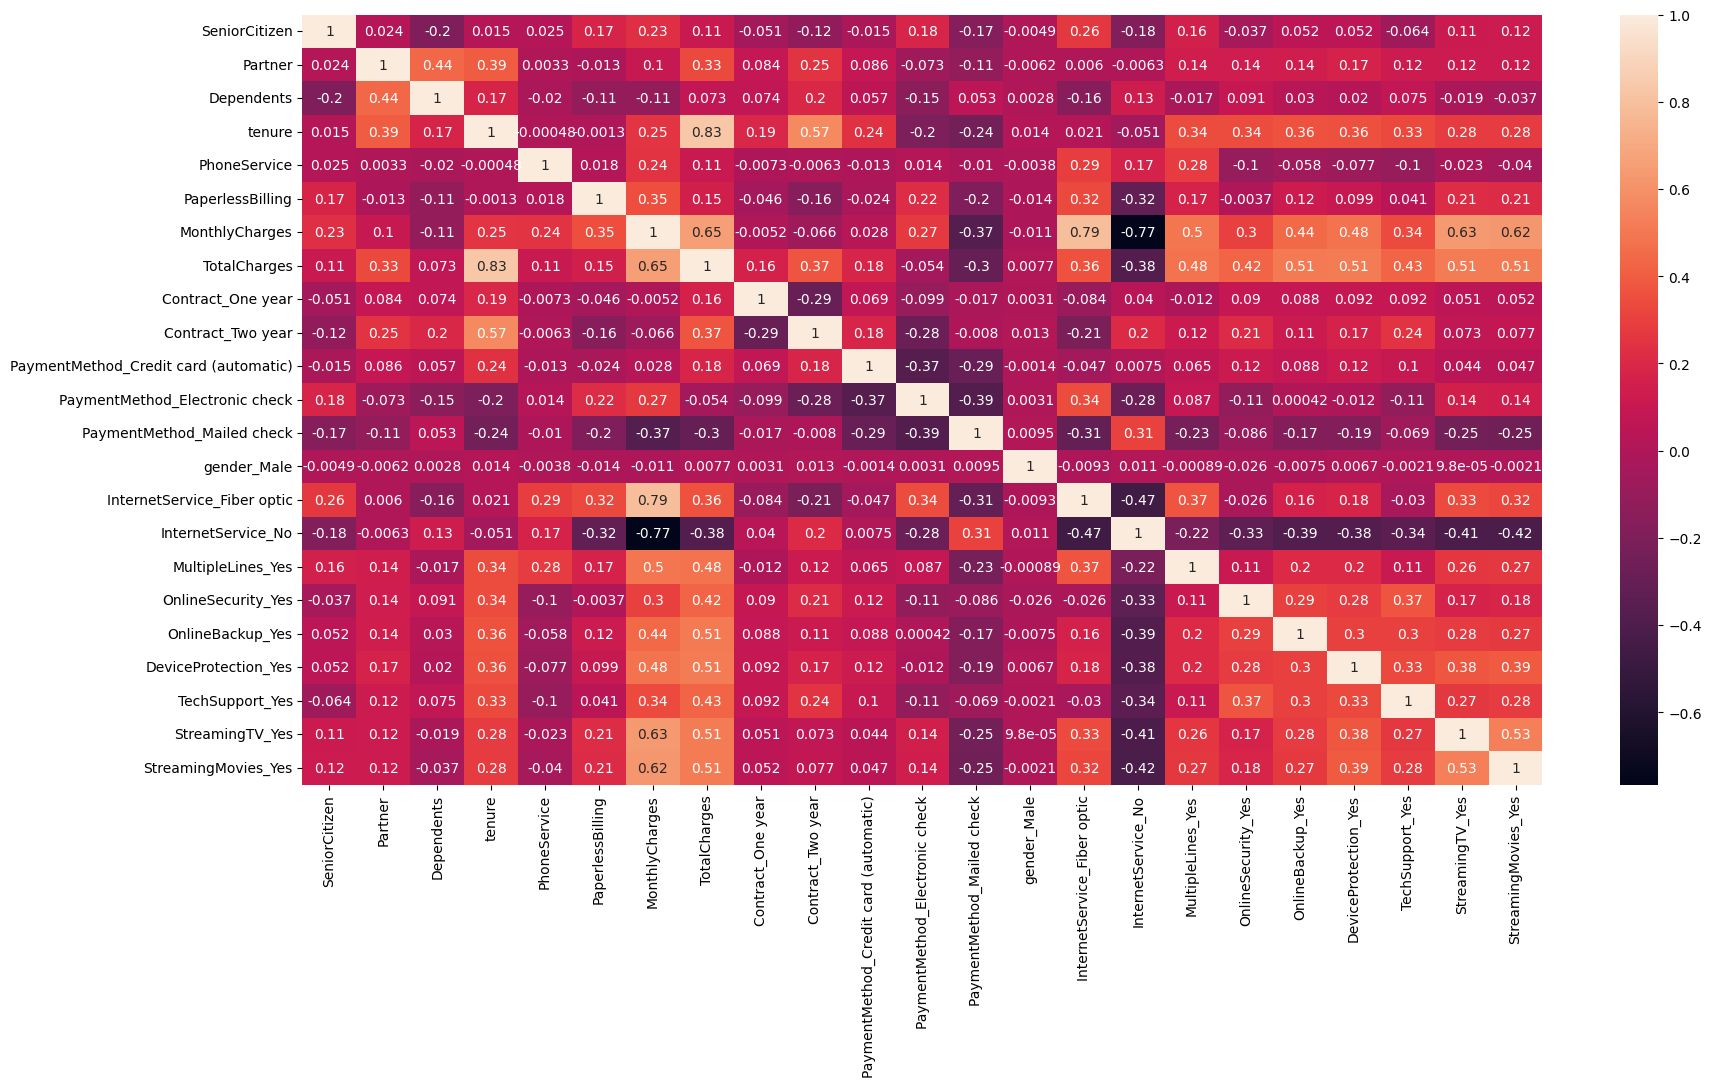

In [30]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Construisons un modèle

In [32]:
import statsmodels.api as sm

In [33]:
# Logistic Regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sun, 24 Dec 2023   Deviance:                       4009.4
Time:                        14:17:12   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

## Selection des variables en utilisant RFE

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [35]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15) # running RFE with 13␣variables as output
rfe = rfe.fit(X_train, y_train)
rfe.support_


array([ True, False, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True])

In [36]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['Partner', 'Dependents', 'PhoneService',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

## Construisons un modèle avec  StatsModels

In [38]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Sun, 24 Dec 2023   Deviance:                       4022.2
Time:                        14:25:15   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

In [39]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [40]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

### Créons un dataframe avec des valeurs réelles de desabonnement et des valeurs prédits de désabonnement

In [42]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.192642,879
1,0,0.275624,5790
2,1,0.599507,6498
3,1,0.513571,880
4,1,0.648233,2784


## créons de la colonne 'predicted' =1 si la churn_prob>0.5 sinon 0

In [43]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()


,Churn,Churn_Prob,CustID,predicted
0,0,0.192642,879,0
1,0,0.275624,5790,0
2,1,0.599507,6498,1
3,1,0.513571,880,1
4,1,0.648233,2784,1


In [44]:
from sklearn import metrics
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted )
print(confusion)


[[3275  360]
 [ 574  713]]


In [45]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))


0.8102397399431126


Nous avons une précision de 81%

## les métriques sur la précision

In [46]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [47]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)
# Let us calculate specificity
TN / float(TN+FP)
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))
# positive predictive value
print (TP / float(TP+FP))
# Negative predictive value
print (TN / float(TN+ FN))



0.09903713892709766
0.6644920782851818
0.8508703559366069


## Traçons la courbe ROC

In [48]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

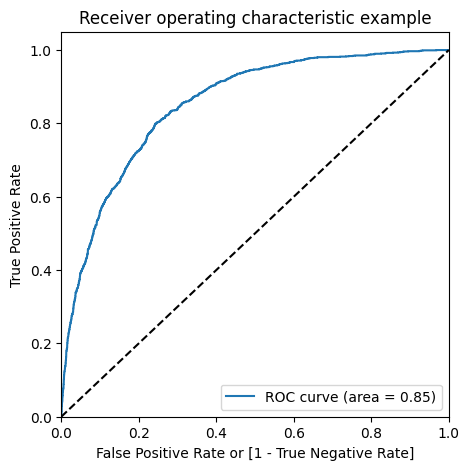

In [49]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn,y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)


## Trouvons le point optimal

In [50]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x >i else 0)
y_train_pred_final.head()


,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.192642,879,0,1,1,0,0,0,0,0,0,0,0
1,0,0.275624,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.599507,6498,1,1,1,1,1,1,1,0,0,0,0
3,1,0.513571,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.648233,2784,1,1,1,1,1,1,1,1,0,0,0


In [51]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)



     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.619057  0.946387  0.503164
0.2   0.2  0.716782  0.867133  0.663549
0.3   0.3  0.771231  0.777001  0.769188
0.4   0.4  0.792767  0.672106  0.835488
0.5   0.5  0.810240  0.554002  0.900963
0.6   0.6  0.804145  0.393162  0.949656
0.7   0.7  0.778342  0.195804  0.984594
0.8   0.8  0.747257  0.039627  0.997799
0.9   0.9  0.738521  0.000000  1.000000


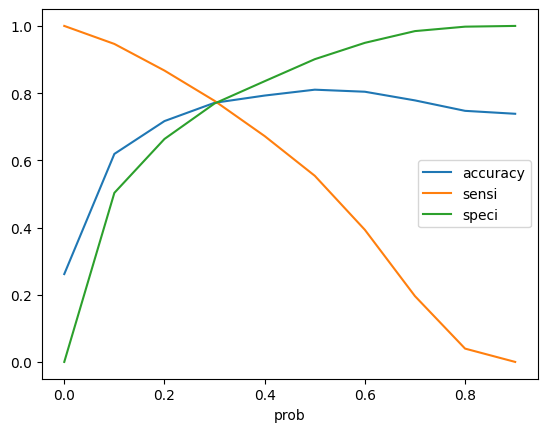

In [52]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


From the curve above, 0.3 is the optimum point to take it as a cutoff probability


In [53]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.192642,879,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.275624,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.599507,6498,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.513571,880,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.648233,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [55]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)


0.7712312068264933

In [56]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.final_predicted )
confusion2

array([[2796,  839],
       [ 287, 1000]])

In [57]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)
# Let us calculate specificity
TN / float(TN+FP)
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))
# Positive predictive value
print (TP / float(TP+FP))
# Negative predictive value
print (TN / float(TN+ FN))



0.23081155433287484
0.5437737901033171
0.9069088550113525


## précision et rappel

In [59]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted )
confusion



array([[3275,  360],
       [ 574,  713]])

In [60]:
# Precision TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])



0.6644920782851818

In [61]:
# Recall TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.554001554001554

In [62]:
from sklearn.metrics import precision_score, recall_score

In [63]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)


0.6644920782851818

In [65]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)



0.554001554001554

 Precision and recall tradeof

In [66]:
from sklearn.metrics import precision_recall_curve

In [67]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

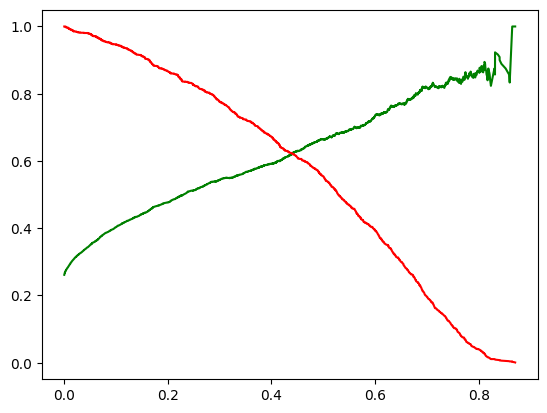

In [68]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


Step 11: Making predictions on the test set


In [69]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])
X_test = X_test[col]
X_test.head()

,SeniorCitizen,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,0,-0.347623,1,0.499951,-0.128378,0,0,1,0,1,0,0,0,0,1
3730,0,0.999203,1,1.319685,1.600302,0,0,1,0,1,0,1,0,1,1
1761,0,1.040015,1,-1.342374,-0.343297,0,1,1,0,0,1,1,0,0,0
2283,0,-1.286319,1,0.223935,-0.979170,0,0,0,1,1,0,0,0,0,0
1872,0,0.346196,0,-1.500335,-0.656086,0,1,0,0,0,1,0,0,0,0


In [70]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [71]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

942     0.435436
3730    0.286097
1761    0.004253
2283    0.592438
1872    0.008149
1970    0.690309
2532    0.287089
1616    0.004133
2485    0.583534
5914    0.119703
dtype: float64

In [72]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
942,0.435436
3730,0.286097
1761,0.004253
2283,0.592438
1872,0.008149


In [73]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()


,Churn,CustID,0
0,0,942,0.435436
1,1,3730,0.286097
2,0,1761,0.004253
3,1,2283,0.592438
4,0,1872,0.008149


In [74]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()


,CustID,Churn,Churn_Prob
0,942,0,0.435436
1,3730,1,0.286097
2,1761,0,0.004253
3,2283,1,0.592438
4,1872,0,0.008149


In [75]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x> 0.42 else 0)
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.435436,1
1,3730,1,0.286097,0
2,1761,0,0.004253,0
3,2283,1,0.592438,1
4,1872,0,0.008149,0


In [76]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7805687203791469

In [77]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1275,  253],
       [ 210,  372]])

In [78]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [79]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)


0.6391752577319587

In [80]:
# Let us calculate specificity
TN / float(TN+FP)


0.8344240837696335